In [1]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import glob
import re

In [2]:
def data_raw_to_data(data_raw, data_option):
    plot_option = data_option #1 = Signal1, 2 = Signal2, 3 = delta of signals
    err = None

    #Choose what to plot
    if plot_option == 3:
        data = data_raw[1] - data_raw[2]
        shift = (data_raw.shape[0]-1)//2
        err1 = abs(data_raw[1+shift])
        err2 = abs(data_raw[2+shift])
        err = err1+err2
    else:
        data = data_raw[plot_option]
        shift = (data_raw.shape[0]-1)//2
        err = data_raw[plot_option+shift]
        
    return data, err

def remove_suffix(input_string, suffix):
    if suffix and input_string.endswith(suffix):
        return input_string[:-len(suffix)]
    return input_string

def remove_prefix(input_string, prefix):
    if prefix and input_string.startswith(prefix):
        return input_string[len(prefix):]
    return input_string

In [10]:
directory = 'G:\\Data\\Qudi_Data\\2024\\07\\20240712\\PulsedMeasurement\\'
path = directory + '20240712-0922-31_Hecho-correlation-alt-phased-long_A-H12-13_NbSe2_S4_rot_2K_70mT_Bnv_OOC_correlation_test_pulsed_measurement'+'.dat'
filelabel = remove_suffix(path,'_pulsed_measurement.dat')
filelabel = remove_prefix(filelabel,directory)+'_analysis'

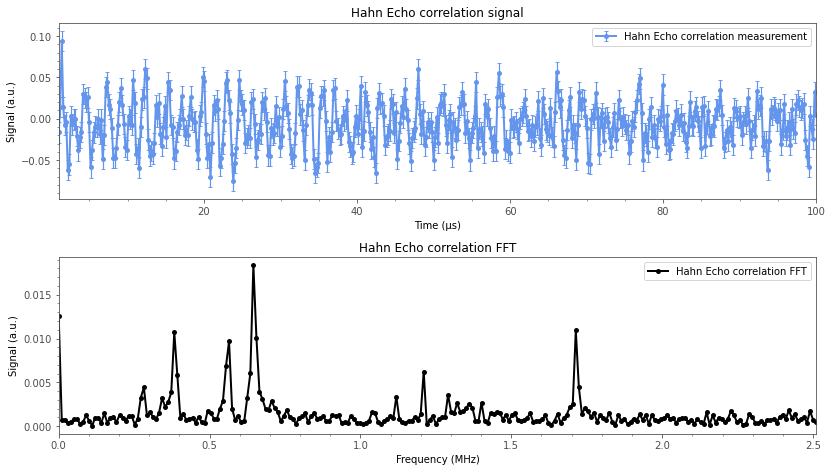

In [13]:
fig = plt.figure(figsize=(35/3,20/3))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax1.set_xscale('log')
# ax2.set_xscale('log')

data_raw = np.loadtxt(path).T
data, err = data_raw_to_data(data_raw, 3)

var_list = data_raw[0]

ax1.errorbar(x=var_list*1e6, y=data,
                         yerr=err, fmt='-o',
                         capsize=2, capthick=0.9,
                        elinewidth=1.2, label=f'Hahn Echo correlation measurement', color='cornflowerblue')

N = len(var_list)
T = var_list[1]-var_list[0]
fft_data = fft(data)
fft_freq = fftfreq(N, T)[:N//2]

ax2.errorbar(x=fft_freq/1e6, y=2.0/N * np.abs(fft_data[0:N//2]), fmt='-o',
                         capsize=2, capthick=0.9,
                        elinewidth=1.2, label=f'Hahn Echo correlation FFT', color='black')


ax1.title.set_text('Hahn Echo correlation signal')
ax2.title.set_text('Hahn Echo correlation FFT')

ax1.set_xlabel('Time (µs)')
ax1.set_ylabel('Signal (a.u.)')
ax2.set_xlabel('Frequency (MHz)')
ax2.set_ylabel('Signal (a.u.)')

# freq = 0.384
# ax2.vlines(freq,0,0.15)
# ax2.text(freq+0.01, 0.05,f'{freq} MHz')
# freq = 1.714
# ax2.vlines(freq,0,0.15)
# ax2.text(freq+0.01, 0.05,f'{freq} MHz')

ax1.set_xlim([var_list[0]*1e6,var_list[-1]*1e6])
ax2.set_xlim([fft_freq[0]/1e6,fft_freq[-1]/1e6])

ax1.legend()
ax2.legend()


fontsize = 20
plt.tight_layout()

with open(directory+filelabel+'.png', 'wb') as f:
    plt.savefig(f,format='png')
plt.show()

In [53]:
0.384/0.06*7.04925

45.1152

In [48]:
0.65/10.705

0.06071929005137786

In [51]:
3.077/3 *0.06

0.061540000000000004